<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Первичный-анализ" data-toc-modified-id="Первичный-анализ-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Первичный анализ</a></span></li><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Преобразование-данных" data-toc-modified-id="Преобразование-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Преобразование данных</a></span><ul class="toc-item"><li><span><a href="#Body" data-toc-modified-id="Body-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Body</a></span></li><li><span><a href="#Color-type" data-toc-modified-id="Color-type-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Color type</a></span></li><li><span><a href="#Seller-type" data-toc-modified-id="Seller-type-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Seller type</a></span></li><li><span><a href="#trim-type" data-toc-modified-id="trim-type-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>trim type</a></span></li></ul></li><li><span><a href="#Исследование-данных" data-toc-modified-id="Исследование-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследование данных</a></span></li><li><span><a href="#" data-toc-modified-id="-5"><span class="toc-item-num">5&nbsp;&nbsp;</span></a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Тестирование</a></span></li></ul></div>

Date: Год выпуска автомобиля.

Make: Марка автомобиля.

Model: издание автомобиля определенной марки.

Trim: Уровни отделки салона автомобиля — это просто разные версии модели.

Body: Тип кузова транспортного средства относится к форме и модели конкретной марки автомобиля.

Transmission: механизм, который передает мощность от двигателя к колесам.

VIN: идентификационный номер транспортного средства.

State: состояние, в котором автомобиль выставлен на аукцион.

Condition: Состояние автомобилей на момент аукциона.

Odometer: расстояние, пройденное автомобилем с момента выпуска.

Color: Цвет кузова автомобиля.

Interior: Цвет салона автомобиля.

Seller: Продавец автомобиля, автосалоны.

mmr: Рекорд рынка Manhiem, рыночная оценочная цена автомобилей.

sellingprice: цена, по которой автомобиль был продан на аукционе.

saledate: Дата продажи автомобиля.

### Первичный анализ

In [79]:
import pandas as pd
import pandas_profiling
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import re

from vininfo import Vin

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score
import category_encoders as ce
from category_encoders import TargetEncoder
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

In [9]:
data = pd.read_csv('C:\\practicum\\train_cars.csv')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440236 entries, 0 to 440235
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          440236 non-null  int64  
 1   make          432193 non-null  object 
 2   model         432113 non-null  object 
 3   trim          431899 non-null  object 
 4   body          429843 non-null  object 
 5   transmission  388775 non-null  object 
 6   vin           440236 non-null  object 
 7   state         440236 non-null  object 
 8   condition     430831 non-null  float64
 9   odometer      440167 non-null  float64
 10  color         439650 non-null  object 
 11  interior      439650 non-null  object 
 12  seller        440236 non-null  object 
 13  sellingprice  440236 non-null  int64  
 14  saledate      440236 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 50.4+ MB


In [11]:
data.head()

year    make   model    trim   body transmission                vin state  \
0  2011    Ford    Edge     SEL    suv    automatic  2fmdk3jc4bba41556    md   
1  2014    Ford  Fusion      SE  Sedan    automatic  3fa6p0h75er208976    mo   
2  2012  Nissan  Sentra  2.0 SL  sedan    automatic  3n1ab6ap4cl698412    nj   
3  2003  HUMMER      H2    Base    suv    automatic  5grgn23u93h101360    tx   
4  2007    Ford  Fusion     SEL  Sedan    automatic  3fahp08z17r268380    md   

   condition  odometer  color interior                      seller  \
0        4.2  111041.0  black    black          santander consumer   
1        3.5   31034.0  black    black       ars/avis budget group   
2        2.2   35619.0  black    black          nissan-infiniti lt   
3        2.8  131301.0   gold    beige  wichita falls ford lin inc   
4        2.0  127709.0  black    black                purple heart   

   sellingprice                                 saledate  
0         12500  Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)  
1         14500  Wed Feb 25 2015 02:00:00 GMT-0800 (PST)  
2          9100  Wed Jun 10 2015 02:30:00 GMT-0700 (PDT)  
3         13300  Wed Jun 17 2015 03:00:00 GMT-0700 (PDT)  
4          1300  Tue Feb 03 2015 04:00:00 GMT-0800 (PST)

In [12]:
data['saledate'] = pd.to_datetime(data['saledate'],utc=True)

In [13]:
def vininfo(data):
    data['country']=Vin(data['vin']).country
    data['make']=Vin(data['vin']).manufacturer
    data['modelid']=Vin(data['vin']).wmi
    data['region']=Vin(data['vin']).region
    return data

Загрузим из вин номера всю возможную информацию и удалим этот столбец

In [14]:
data=data.apply(vininfo, axis=1)

In [15]:
data_vin = data['vin']
data = data.drop('vin', axis = 1)

In [16]:
for col in ['make', 'model', 'trim', 'body', 'transmission', 'seller']:
    data[col] = data[col].str.lower()

In [17]:
pandas_profiling.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Вывод** Генеральная совокупность содержит инфромацию о 440236 записях о сделках. Всего в датафрейме есть информациях по 14 признакам автомобиля и его продаже и один целевой - сумма сделки. Благодаря наличию вин номера автомобиля можно добавить или продублировать часть информации: страну производства,  бренд, id модели, регион регистрации. 
Первичный анализ данных показал, какие проблемы могут возникнуть при построении модели:
- слишком большая вариативность уникальных значений в названиях продавца(seller) и комплектации(trim) автомобиля
- высокая корреляция между годом выпуска, состоянием, стоимостью и пробегом автомобиля - ожидаемый эффект, но требующий дополнительной проверки
- в данных имеются пропуски, которые достигают самого высокого значения в столбце transmission - до 11.7 процентов
- добавленные после расшифровки vin признаки частично дублируют имеющиеся - для удобства при анализе будем использовать текстовые варианты, а для моделирования уникальные id. кроме этого, они помогут восстановить пропуски в этих столбцах
- в датафрейме данные о продажах автомобилей с 2014 по июль 2015 года
- автомобили преимущественно из Северной Америки - США и Канады


### Обработка пропусков

Еще раз оценим количество пропусков в столбцах

In [18]:
data_na = data.isna().mean().sort_values(ascending = False)
print(data_na.loc[data_na>0])

transmission    0.116894
body            0.023608
condition       0.021364
trim            0.018938
model           0.018451
color           0.001331
interior        0.001331
odometer        0.000157
dtype: float64


В столбце трансмиссия всего два уникальных значения, автомат и механика. В настоящее время библиотека vininfo не позволяет восстанавливать эту информацию для всех марок автомобилей, поэтому не получится заполнить этот пропуск по vin. Добавим нейтральное значение 'unknown'

In [19]:
data['transmission'].unique()

array(['automatic', nan, 'manual'], dtype=object)

In [20]:
data['transmission'] = data['transmission'].fillna('unknown')

In [21]:
#data = data.dropna(subset = ['make'])
data = data.dropna(subset = ['condition'])
data_na = data.isna().mean().sort_values(ascending = False)
print(data_na.loc[data_na>0])

body        0.023009
trim        0.019065
model       0.018701
color       0.001184
interior    0.001184
odometer    0.000046
dtype: float64


Проверим названия марок автомобилей

In [22]:
data.groupby('make')['model'].unique()

make
acura                             [mdx, tl, tsx sport wagon, tsx, rsx, rl, cl, i...
am                                                                        [nan, h1]
aston martin lagonda limited                              [v8 vantage, db9, rapide]
audi                              [a6, q7, a4, a7, s4, a8, nan, a5, s7, q5, tt, ...
auto alliance international                                 [mustang, shelby gt500]
                                                        ...                        
toyota mexico                                                              [tacoma]
unsupportedbrand                              [nan, tracer, sunfire, spirit, metro]
volkswagen                        [passat, golf, beetle, jetta, touareg, jetta s...
volkswagen commercial vehicles                                       [eurovan, nan]
volvo cars                        [s60, xc90, xc, s80, v70, c70, xc60, s40, xc70...
Name: model, Length: 81, dtype: object

Данные о модели заполним заглушкой other для удобства анализа, для моделирования будем использовать восстановленный по vin modelid

In [23]:
data['model'] = data['model'].fillna('other')

В информации о кузове нет предустановленной системой заглушки, поэтому заполняем пропуски 'unknown'. В графе interior в случае отсутствия значения система использует прочерки, как и графа color

In [24]:
data['body'].unique()

array(['suv', 'sedan', nan, 'wagon', 'minivan', 'extended cab',
       'regular cab', 'coupe', 'supercrew', 'convertible', 'crew cab',
       'supercab', 'hatchback', 'g coupe', 'g convertible', 'access cab',
       'g sedan', 'e-series van', 'quad cab', 'tsx sport wagon', 'van',
       'cts coupe', 'koup', 'king cab', 'double cab', 'elantra coupe',
       'crewmax cab', 'genesis coupe', 'g37 coupe', 'club cab',
       'beetle convertible', 'mega cab', 'regular-cab', 'xtracab',
       'q60 coupe', 'promaster cargo van', 'cts-v coupe', 'cts wagon',
       'cab plus 4', 'g37 convertible', 'transit van', 'q60 convertible',
       'ram van', 'granturismo convertible', 'cab plus', 'cts-v wagon'],
      dtype=object)

In [25]:
data['body'] = data['body'].fillna('unknown')

In [26]:
data['interior'].unique()

array(['black', 'beige', 'gray', 'tan', 'brown', '—', 'off-white', nan,
       'blue', 'white', 'silver', 'red', 'green', 'gold', 'purple',
       'orange', 'burgundy', 'yellow'], dtype=object)

In [27]:
data['interior'] = data['interior'].fillna('—')

In [28]:
data['color'].unique()

array(['black', 'gold', 'silver', 'blue', 'white', 'gray', '—', 'red',
       'brown', 'green', 'beige', 'orange', nan, 'off-white', 'burgundy',
       'yellow', 'charcoal', 'purple', 'turquoise', 'lime', 'pink'],
      dtype=object)

In [29]:
data['color'] = data['color'].fillna('—')

Информацию о комплектации заполним модой значенем 'base'

In [30]:
data['trim'] = data['trim'].fillna('base')

Пропуски в графе odometer не имеют какого-то предсказуемого значения и их единичное количество, поэтому они будут удалены

In [31]:
data.loc[data['odometer'].isna()]

year              make             model       trim          body  \
60990   2014              ford            fiesta         st     hatchback   
63076   2006        mitsubishi             other       base       unknown   
77892   2001     mercedes-benz           c-class       c240         sedan   
86565   2007         chevrolet          colorado         lt      crew cab   
97325   2010              cami           equinox        lt1           suv   
141016  2008              ford             f-150        xlt     supercrew   
143066  2002             buick             regal         gs         sedan   
144576  2001             buick             regal         ls         sedan   
161626  2012               bmw                x5  xdrive35d           suv   
179737  2000             buick           lesabre     custom         sedan   
186299  2000     mercedes-benz           m-class      ml320           suv   
289042  2001               bmw          7 series      740il         sedan   
289677  2000             buick           lesabre     custom         sedan   
313701  2009  chevrolet mexico               hhr         lt         wagon   
321765  1999         chevrolet            malibu         ls         sedan   
335445  2011         gmc truck       sierra 1500        sle  extended cab   
339951  2007              ford              edge        sel           suv   
408555  2005              ford             focus     zx4 se         sedan   
418021  2002              ford  f-350 super duty        xlt      crew cab   
422735  2014        volkswagen             jetta    se pzev         sedan   

       transmission state  condition  odometer     color interior  \
60990        manual    ga        4.6       NaN     black    black   
63076        manual    pr        2.1       NaN      gray     gray   
77892        manual    pa        1.9       NaN  burgundy     gray   
86565     automatic    ca        1.9       NaN      gold    black   
97325       unknown    ab        1.0       NaN      blue    black   
141016    automatic    mi        3.6       NaN     black    black   
143066    automatic    oh        2.4       NaN      gray    brown   
144576    automatic    ne        1.9       NaN    silver     gray   
161626    automatic    ca        2.9       NaN     black    brown   
179737      unknown    nc        1.0       NaN     white        —   
186299    automatic    ca        2.6       NaN     white    beige   
289042    automatic    fl        2.1       NaN      gray     gray   
289677    automatic    ga        2.1       NaN         —        —   
313701    automatic    pa        3.4       NaN      blue     gray   
321765    automatic    pr        2.0       NaN     white     gray   
335445    automatic    wa        4.4       NaN     white    black   
339951      unknown    ca        3.2       NaN      gray        —   
408555    automatic    fl        1.9       NaN     black     gray   
418021      unknown    ca        2.0       NaN     white     gray   
422735       manual    il        4.4       NaN     white    black   

                                             seller  sellingprice  \
60990                                  carworks inc         28650   
63076                                 oriental bank          1700   
77892                   affinity truck & auto sales          1200   
86565                          garys auto sales inc          7800   
97325                               go auto finance          6750   
141016         larry hudson chevrolet buick gmc inc         16700   
143066               car now acceptance co/columbus           650   
144576  select remarketing group llc/north american           500   
161626     financial services remarketing/rail cars         35000   
179737             crossroads nissan of wake forest          1250   
186299                                cig financial          1500   
289042                                automatch usa          2000   
289677                            us auto s

In [32]:
data = data.dropna(subset = ['odometer'])

Проверим, что все пропуски удалены

In [33]:
data_na = data.isna().mean().sort_values(ascending = False)
print(data_na.loc[data_na>0])

Series([], dtype: float64)


**Выводы** наибольшее количество пропусков в графе трансмиссия - не подлежит восстановлению, так как не расшифровывается из vin и может варьироваться у одной модели. Они заменены на нейтральное значение, как и пропуски в графе model и body

interior и color имеют уже используемую в системе заглушку '-', а trim был заполнен модой 'base'


### Преобразование данных

#### Body

Различия между названиями кузовов внутри одной марки не имеют существенного значения, поэтому будут заменены на универсальные названия: 'cab','wagon','convertible','sedan','van','coupe'

In [34]:
bodies=data['body'].unique()
bodies

array(['suv', 'sedan', 'unknown', 'wagon', 'minivan', 'extended cab',
       'regular cab', 'coupe', 'supercrew', 'convertible', 'crew cab',
       'supercab', 'hatchback', 'g coupe', 'g convertible', 'access cab',
       'g sedan', 'e-series van', 'quad cab', 'tsx sport wagon', 'van',
       'cts coupe', 'koup', 'king cab', 'double cab', 'elantra coupe',
       'crewmax cab', 'genesis coupe', 'g37 coupe', 'club cab',
       'beetle convertible', 'mega cab', 'regular-cab', 'xtracab',
       'q60 coupe', 'promaster cargo van', 'cts-v coupe', 'cts wagon',
       'cab plus 4', 'g37 convertible', 'transit van', 'q60 convertible',
       'ram van', 'granturismo convertible', 'cab plus', 'cts-v wagon'],
      dtype=object)

In [35]:
bodies_short=['cab','wagon','convertible','sedan','van','coupe']

def short_name(body):
    body_list = re.split("-| ", body)
    for name in bodies_short:
        if name in body_list:
            return name
    if body == 'koup':
            return 'coupe'
    if body in ['supercab', 'xtracab']:
            return 'cab'
    else:
        return body


In [36]:
data['body_short'] = data['body'].apply(short_name)   

In [37]:
data['body_short'].unique()

array(['suv', 'sedan', 'unknown', 'wagon', 'minivan', 'cab', 'coupe',
       'supercrew', 'convertible', 'hatchback', 'van'], dtype=object)

#### Color type

Согласно разведывательному анализу, корреляция цены и цвета минимальна, на новых автомобилях обычно базовые цвета - черный, белый и серый - продают без наценки за окрас, а остальные - за дополнительную плату. Поэтому разделим цвета на базовые и окрашенные

In [38]:
def color_type(color):
    if color in ['black', 'charcoal', 'white', 'grey']:
        return 'base color'
    if color == '—':
        return 'unknown'
    else:
        return 'colored'
    

In [39]:
data['color_type'] = data['color'].apply(color_type)

#### Seller type

Названия продавцов имеют слишком большое количество уникальных значений, поэтому этот столбец будет преобразован в типы компаний - топ-продавцы, крупные, средние, мелкие и единичные, чтобы исследовать в дальнейшем их влияние на стоимость

In [40]:
len(data['seller'].unique())

11798

In [41]:
sellers = data['seller'].value_counts().to_frame()

In [42]:
sellers.describe()

seller
count  11798.000000
mean      36.515596
std      365.677994
min        1.000000
25%        1.000000
50%        3.000000
75%       10.000000
max    15823.000000

In [43]:
def seller_type(seller):
    if seller>10000:
        return 'top'
    if seller>1000:
        return 'large'
    if seller>100:
        return 'medium'
    if seller>3:
        return 'small'
    else:
        return 'single'

In [44]:
sellers['seller_type'] = sellers['seller'].apply(seller_type)
sellers=sellers.drop('seller', axis=1)
sellers.head()

seller_type
nissan-infiniti lt                    top
ford motor credit company,llc         top
the hertz corporation                 top
santander consumer                    top
avis corporation                      top

In [45]:
sellers.reset_index(inplace=True)
sellers.columns=['seller', 'seller_type']

In [46]:
data = data.merge(sellers, on='seller')

#### trim type

Столбец с информацией о комплектации trim имеет очень высокую вариативность значений. Так как у каждой модели часто бывают уникальные названия комплектаций, этот признак будет малоинформативен и сильно коллинеарен с моделью. Чтобы этого избежать упростим его, оставив универсальное значение base и comfort

In [47]:
def trim_type(trim):
    if trim == 'base':
        return 'base'
    else:
        return 'comfort'

In [48]:
data['trim_type'] = data['trim'].apply(trim_type)

In [49]:
#sns.pairplot(data, hue='seller')

### Исследование данных

Предварительно создадим новый датафрейм для моделирования. Удалим признаки, которые привели к более узким типам.

In [50]:
data_mod=data.copy().drop(['color', 'seller', 'body', 'model', 'trim'], axis=1)

In [51]:
pandas_profiling.ProfileReport(data_mod)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

В столбце со значениями пробега есть высокие значения, до миллиона км. Проверим все значения более 500000 км. Судя по таблице, это не выбросы, а уникальные случаи - автомобили старых годов выпуска, либо очень активно используемые(судя по оценке состояния). Удалять их не будем.

In [52]:
data_mod.query('odometer>500000')

year              make transmission state  condition  odometer  \
200     2012           hyundai    automatic    oh        1.0  999999.0   
337     2004     chevrolet usa    automatic    ga        1.9  999999.0   
372     2006             mazda    automatic    fl        2.0  999999.0   
780     2005            nissan    automatic    il        1.9  999999.0   
2222    2006            nissan    automatic    md        2.7  999999.0   
2801    2008              jeep    automatic    tx        1.9  999999.0   
3277    2009      dodge canada    automatic    tx        1.0  999999.0   
3417    2005               bmw    automatic    il        1.0  999999.0   
6619    2009      dodge canada    automatic    il        1.0  999999.0   
6637    2007           pontiac    automatic    ms        1.0  999999.0   
7262    2007             buick    automatic    oh        2.0  999999.0   
7949    2013         chevrolet      unknown    tx        1.0  999999.0   
8964    2006          chrysler    automatic    oh        1.0  999999.0   
9501    2014            toyota    automatic    fl        1.0  999999.0   
10672   2012            nissan    automatic    oh        1.0  999999.0   
10918   2009      dodge canada    automatic    md        1.0  999999.0   
11415   2009            saturn    automatic    ny        2.0  999999.0   
11421   2003               bmw    automatic    tx        2.7  999999.0   
52073   2008            nissan      unknown    md        1.0  999999.0   
52972   2007             mazda       manual    tx        2.3  999999.0   
54384   2006              ford    automatic    ga        1.9  999999.0   
54416   2004            nissan    automatic    md        1.0  999999.0   
85869   2005               kia    automatic    oh        1.0  999999.0   
86041   1999              ford      unknown    ca        1.9  999999.0   
86524   2003               gmc    automatic    oh        2.0  999999.0   
88141   2007            toyota    automatic    oh        1.9  537334.0   
134432  2011            nissan    automatic    ms        2.3  999999.0   
137339  2007              ford    automatic    ms        1.9  999999.0   
138192  2006               kia    automatic    ms        1.0  999999.0   
157496  2013               kia    automatic    ca        1.0  999999.0   
160283  2013           genesis    automatic    ca        1.0  999999.0   
218776  2005            nissan    automatic    md        2.1  999999.0   
234776  2003             buick    automatic    ca        2.6  999999.0   
235874  2014               kia    automatic    tx        1.0  999999.0   
236449  2013               kia    automatic    ga        1.0  999999.0   
242899  2001         chevrolet    automatic    fl        1.0  999999.0   
254781  2013        mitsubishi    automatic    il        2.8  522212.0   
255909  2013              ford    automatic    fl        1.0  999999.0   
255930  2011              ford    automatic    fl        2.0  999999.0   
274765  2001         chevrolet    automatic    ca        1.0  999999.0   
274798  1998             lexus    automatic    ca        2.0  999999.0   
274834  2003     mercedes-benz    automatic    ca        2.2  999999.0   
274853  2003            nissan    automatic    ca        3.2  999999.0   
274960  2003              ford    automatic    ca        2.0  999999.0   
274985  2003         chevrolet    automatic    ca        2.0  999999.0   
274993  2006  chevrolet canada    automatic    ca        2.0  999999.0   
277401  1997             mazda    automatic    fl        1.0  999999.0   
278158  2006              ford    automatic    oh        1.9  999999.0   
284905  2003            saturn    automatic    ga        2.3  694978.0   
314193  2007     chevrolet usa    automatic    fl        1.9  999999.0   
344261  2002              ford    automatic    fl        1.9  999999.0   
357815  2005           genesis    automatic    ms        1.0  999999.0   
362303  2008         chevrolet    automatic    md        1.9  999999.0   
376445  2002

In [53]:
data_mod['saledate'].describe()

count                        430811
unique                         3570
top       2015-02-09 17:30:00+00:00
freq                           4209
first     2014-01-01 01:15:00+00:00
last      2015-07-20 19:30:00+00:00
Name: saledate, dtype: object

Разобьем дату продажи на два столбца - год и месяц и посмотрим статистику по отдельности. Пик продаж приходятся на начало года, низкий сезон - апрель и июль. Стоит отметить, что в датафрейме за некоторые месяцы данных нет совсем

<AxesSubplot:>

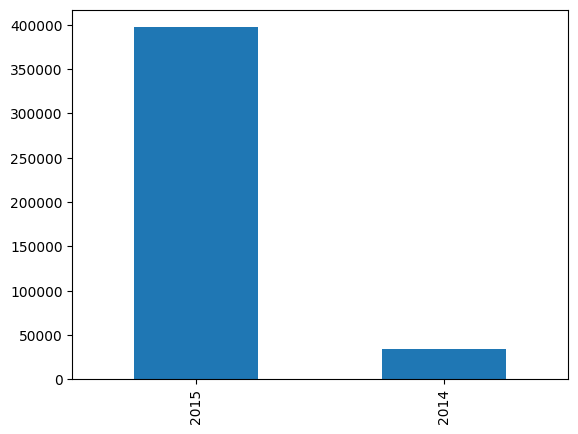

In [54]:
data_mod['sale_year'] = pd.DatetimeIndex(data_mod['saledate']).year
data_mod['sale_year'].value_counts().plot(kind='bar')

<AxesSubplot:>

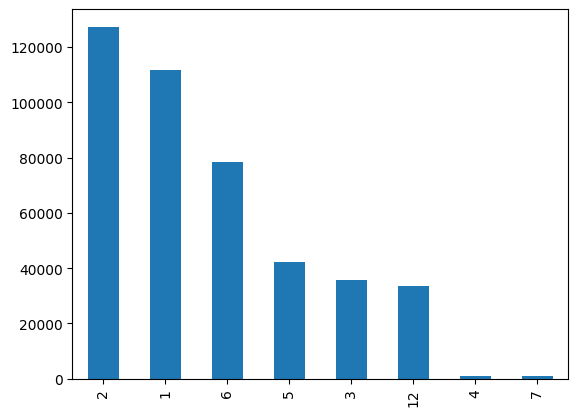

In [55]:
data_mod['sale_month'] = pd.DatetimeIndex(data_mod['saledate']).month
data_mod['sale_month'].value_counts().plot(kind='bar')

In [56]:
data_mod=data_mod.drop(['saledate'], axis=1)

Стоимость автомобиля зависит от года выпуска, пробега и состояния ожидаемым образом - чем лучше и новее автомобиль, тем он дороже. Ретромодели иногда могут возрастать в цене.

<AxesSubplot:xlabel='year', ylabel='sellingprice'>

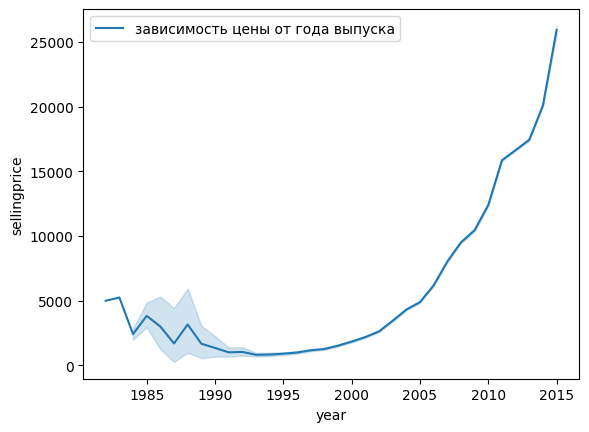

In [57]:
sns.lineplot(data=data_mod, x="year", y="sellingprice", label = 'зависимость цены от года выпуска')

<AxesSubplot:xlabel='condition', ylabel='sellingprice'>

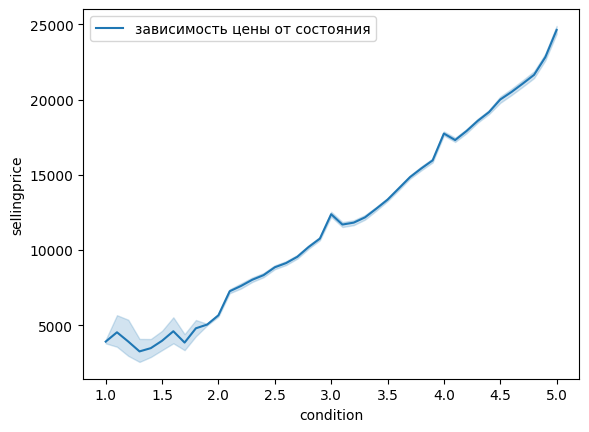

In [58]:
sns.lineplot(data=data_mod, x="condition", y="sellingprice", label = 'зависимость цены от состояния')

Тип продавца не оказывает влияния на стоимость, и чтобы не усложнять модель, удалим его

In [59]:
data_mod = data_mod.drop('seller_type', axis = 1)

###

In [60]:
data_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430811 entries, 0 to 430810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          430811 non-null  int64  
 1   make          430811 non-null  object 
 2   transmission  430811 non-null  object 
 3   state         430811 non-null  object 
 4   condition     430811 non-null  float64
 5   odometer      430811 non-null  float64
 6   interior      430811 non-null  object 
 7   sellingprice  430811 non-null  int64  
 8   country       430811 non-null  object 
 9   modelid       430811 non-null  object 
 10  region        430811 non-null  object 
 11  body_short    430811 non-null  object 
 12  color_type    430811 non-null  object 
 13  trim_type     430811 non-null  object 
 14  sale_year     430811 non-null  int64  
 15  sale_month    430811 non-null  int64  
dtypes: float64(2), int64(4), object(10)
memory usage: 72.0+ MB


In [61]:
#выделим целевой признак
target_train = data_mod['sellingprice']
features_train = data_mod.drop('sellingprice', axis = 1)

In [62]:
#создадим списки с называниями категориальных и непрерывных признаков
categorical = ['modelid', 'make', 'transmission', 'state', 'interior', 'country', 'region', 'body_short', 'color_type', 'trim_type' ]
numeric = ['year', 'month', 'condition', 'sale_year', 'sale_month']

In [63]:
te = TargetEncoder(cols=categorical, min_samples_leaf=20, smoothing=10).fit(features_train, target_train)
#трансформируем тренировочную
features_train_te  = te.transform(features_train)
print(features_train_te.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 430811 entries, 0 to 430810
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          430811 non-null  int64  
 1   make          430811 non-null  float64
 2   transmission  430811 non-null  float64
 3   state         430811 non-null  float64
 4   condition     430811 non-null  float64
 5   odometer      430811 non-null  float64
 6   interior      430811 non-null  float64
 7   country       430811 non-null  float64
 8   modelid       430811 non-null  float64
 9   region        430811 non-null  float64
 10  body_short    430811 non-null  float64
 11  color_type    430811 non-null  float64
 12  trim_type     430811 non-null  float64
 13  sale_year     430811 non-null  int64  
 14  sale_month    430811 non-null  int64  
dtypes: float64(12), int64(3)
memory usage: 68.7 MB
None


In [64]:
scaler = StandardScaler()
#делаем fit на тренировочной выборке
scaler.fit(features_train_te)
#трансформируем тренировочную
features_train_te_scaled = features_train_te.copy()
features_train_te_scaled = scaler.transform(features_train_te)

In [ ]:
def model_grid(parameters, model):
    model_grid = GridSearchCV(model, parameters, scoring='neg_mean_absolute_percentage_error', cv=3, n_jobs = -1, verbose = 10)
    model_res = model_grid.fit(features_train_te_scaled,target_train)
    print('Оптимальные параметры', model_grid.best_params_)
    print('MAPE тренировочной выборки на лучшей модели', -model_grid.best_score_.round(3))
    return model_res

In [ ]:
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20]}

model = Ridge(random_state = 42)

ridge_res = model_grid(parameters, model)

In [ ]:
model = CatBoostRegressor(verbose=False, random_seed = 42)

parameters = {'learning_rate': [0.05, 0.25],
        'depth': [4, 6],
        'iterations':[25,100,500]}

cat_res = model_grid(parameters, model)

In [ ]:
model = LGBMRegressor(boosting_type='gbdt', verbose=10, seed=42)

parameters = {'n_estimators': [10, 20, 30, 40], 
              'num_leaves': [10, 15, 20, 25],
             'learning_rate': np.logspace(-3, 0, 5)}

gbm_grid = model_grid(parameters, model)

### Тестирование

In [93]:
data_test = pd.read_csv('C:\\practicum\\test_cars.csv')
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110058 entries, 0 to 110057
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          110058 non-null  int64  
 1   make          107997 non-null  object 
 2   model         107979 non-null  object 
 3   trim          107944 non-null  object 
 4   body          107464 non-null  object 
 5   transmission  97047 non-null   object 
 6   vin           110058 non-null  object 
 7   state         110058 non-null  object 
 8   condition     107679 non-null  float64
 9   odometer      110039 non-null  float64
 10  color         109900 non-null  object 
 11  interior      109900 non-null  object 
 12  seller        110058 non-null  object 
 13  saledate      110058 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 11.8+ MB


In [94]:
data_test=data_test.apply(vininfo, axis=1)

In [96]:
data_test['saledate'] = pd.to_datetime(data_test['saledate'],utc=True)
data_test['sale_month'] = pd.DatetimeIndex(data_test['saledate']).month
data_test['sale_year'] = pd.DatetimeIndex(data_test['saledate']).year

In [97]:
data_test['body'] = data_test['body'].fillna('unknown')
data_test['trim'] = data_test['trim'].fillna('base')
data_test['transmission'] = data_test['transmission'].fillna('unknown')
data_test['color'] = data_test['color'].fillna('—')
data_test['interior'] = data_test['interior'].fillna('—')
data_test['condition'] = data_test['condition'].fillna(5-(data_test['sale_year']-data_test['year'])*0.2)
data_test['odometer'] = data_test['odometer'].fillna((data_test['sale_year']-data_test['year'])*20000)

In [106]:
data_test['body_short'] = data_test['body'].apply(short_name)   
data_test['color_type'] = data_test['color'].apply(color_type)
data_test['trim_type'] = data_test['trim'].apply(trim_type)
data_mod_test=data_test.copy().drop(['color', 'seller', 'body', 'model', 'trim', 'saledate', 'vin'], axis=1)


In [107]:
data_mod_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110058 entries, 0 to 110057
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          110058 non-null  int64  
 1   make          110058 non-null  object 
 2   transmission  110058 non-null  object 
 3   state         110058 non-null  object 
 4   condition     110058 non-null  float64
 5   odometer      110058 non-null  float64
 6   interior      110058 non-null  object 
 7   country       110058 non-null  object 
 8   modelid       110058 non-null  object 
 9   region        110058 non-null  object 
 10  sale_month    110058 non-null  int64  
 11  sale_year     110058 non-null  int64  
 12  body_short    110058 non-null  object 
 13  color_type    110058 non-null  object 
 14  trim_type     110058 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 12.6+ MB


In [108]:
data_mod_test_sc  = te.transform(data_mod_test)
data_mod_test_sc = scaler.transform(data_mod_test_sc)

In [110]:
best_cat_res = cat_res.best_estimator_
best_cat_res.fit(features_train_te_scaled, target_train)
predictions = best_cat_res.predict(data_mod_test_sc)

In [124]:
len(predictions)

110058

<AxesSubplot:>

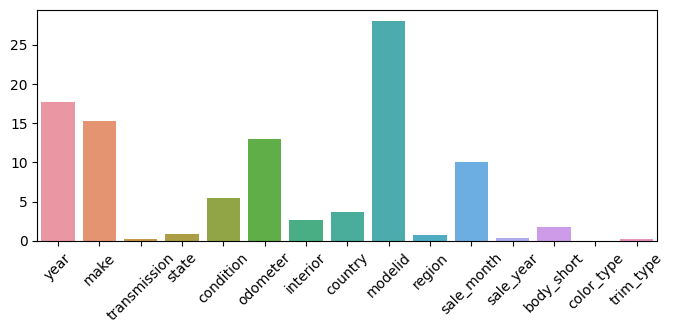

In [112]:
plt.figure(figsize=[8, 3])
plt.xticks(rotation=45)
sns.barplot(x = data_mod_test.columns, y = best_cat_res.feature_importances_)

In [125]:
submission = data_test['vin'].to_frame()
submission['sellingprice']=predictions

In [126]:
submission.to_csv(('C:\\practicum\\out.csv'), index=False)

In [127]:
submission.head()

vin  sellingprice
0  1g6dp567450124779   4801.765571
1  1gtw7fca7e1902207  23716.918703
2  jn8az1mw6dw303497  19479.610595
3  2g1wf5e34d1160703   9352.391249
4  1n6aa0ec3dn301209  16308.885633

**Вывод** построена модель Catboost с метрикой mape на тесте 35. Наибольшее влияние оказывает модель и производитель, а также год выпуска. Чуть в меньшей степени - состояние, пробег и месяц продажи. Внешние параметры на формирование стоимости влияют слабо